In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib.cm as cm

# def generate_colors(n):
#     return [cm.viridis(i / n) for i in range(n)]

plt.style.use('ggplot')
plt.rc('figure', figsize=(15, 6))


# Решаем задачу
$$
\begin{cases}
u_t = u_{xx} + bu, \quad b = const > 0, x \in (0, 1) \\
u(t, 0) = u (t, 1) = 0 \\
u(0, x) = \text{sin}(\pi x)
\end{cases}
$$
Оно имеет решение $u(t, x) = e^{-t(\pi^2 - b)}sin(\pi x)$

Схема:
$$
\begin{cases}
\frac{u_m^{n+1} - u_m^{n}}{\tau} = \frac{u_{m+1}^{n+1} - 2 u_{m}^{n+1} + u_{m-1}^{n+1}}{h^2} + b u_m^{n+1} \\
u_0^n = u_{M}^n = 0 \\
u_m^0 = \text{sin}(\pi x_m)
\end{cases}
$$

In [85]:
# Параметры задачи
T = 1.0      # Время моделирования
N = 10        # Число временных шагов
M = 10     # Число пространственных узлов
x_min = 0     # Левая граница
x_max = 1     # Правая граница
b = 10.       # Коэффициент роста

# Функция начальных условий
def initial_condition(x):
    return np.sin(np.pi * x)

# Точное решение
def exact_solution(t, x):
    return np.exp(-(np.pi ** 2 - b) * t) * np.sin(np.pi * x)

# Шаги по пространству и времени
h = (x_max - x_min) / M
tau = T / N
x = np.linspace(x_min, x_max, M + 1)

# Инициализация сеточной функции
u = np.zeros((N + 1, M + 1))
u[0, :] = initial_condition(x)  # Начальное условие

# Матрица A для системы уравнений
A = np.zeros((M - 1, M - 1))
diag_val = 1 / tau - b + 2 / h**2
off_diag_val = -1 / h**2

A[0, 0] = diag_val
A[0, 1] = off_diag_val

for j in range(1, M - 2):
    A[j, j - 1] = off_diag_val
    A[j, j] = diag_val
    A[j, j + 1] = off_diag_val

A[M - 2, M - 3] = off_diag_val
A[M - 2, M - 2] = diag_val

# Численный расчет
for i in range(1, N + 1):
    rhs = u[i - 1, :] / tau
    u[i, 1:-1] = np.linalg.solve(A, rhs[1:-1])


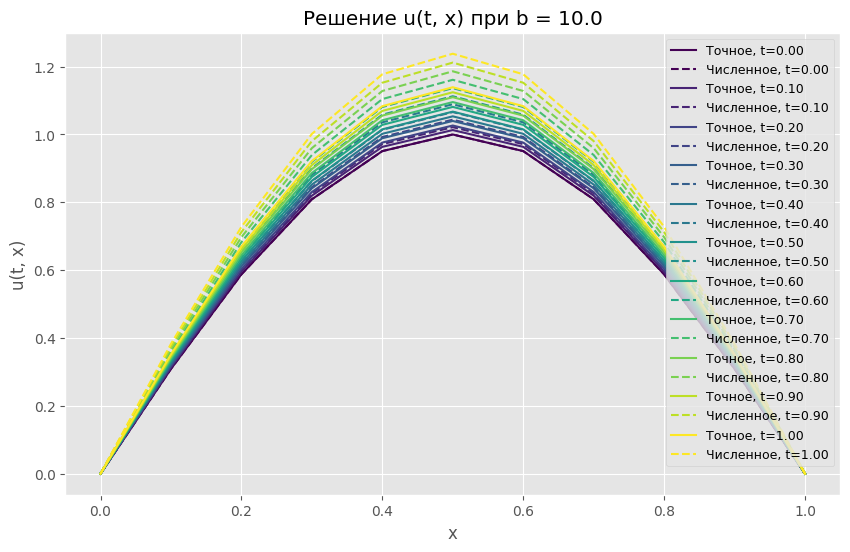

In [86]:
# Построение графика
plt.figure(figsize=(10, 6))

# Цвета для линий
colors = plt.cm.viridis(np.linspace(0, 1, N + 1))

for i in range(N + 1):
    t = tau * i
    plt.plot(x, exact_solution(t, x), color=colors[i], label=f"Точное, t={t:.2f}")
    plt.plot(x, u[i, :], '--', color=colors[i], label=f"Численное, t={t:.2f}")

plt.title(f"Решение u(t, x) при b = {b}")
plt.xlabel("x")
plt.ylabel("u(t, x)")
plt.legend(loc="upper right", fontsize=9)
plt.grid(True)

plt.show()

Это проблема, поэтому вводится задача управления граничным условием так, чтобы решение не росло по t:
$$
\begin{cases}
v_t = v_{xx} + bv, \quad b = const > 0, x \in (0, 1) \\
v(t, 0) = 0 \\
v(t, 1) = \mu (t) \quad (\text{не известна})\\
v(0, x) = \text{sin}(\pi x) \\
||v(t)|| \to 0, t \to \infty
\end{cases}
$$

% Рассматриваем задачу на расширенном отрезке [0,2]
Искать это $\mu(t)$ явно трудно, поэтому решаем задачу на расширенном отрезке $[0, 2]$:
$$
\begin{cases}
w_t = w_{xx} + bw, \quad b = const > 0, \quad x \in (0, 2), \\  % Уравнение теплопроводности с источником
w(t, 0) = w(t, 2) = 0, \\  % Граничные условия
w(0, x) =
\begin{cases}
\sin(\pi x), \quad x \in [0, 1], \\ % Начальное условие на [0,1]
\dots, \quad x \in (1, 2].
\end{cases} \\
||w(t)|| \to 0, \quad  t \to \infty. % Условие затухания нормы решения
\end{cases}
$$

% Представляем решение в виде разложения по синусам
Решение задачи имеет вид
$$
w(t, x) = \sum_{k = 1}^\infty C_k(t) \sin\left(\frac{\pi k x}{2}\right), \quad C_k(t) = e^{(-\pi^2 k^2 / 4 + b)t}.
$$
% Условие ограничения роста
Это разложение не растет, если первые несколько коэффициентов $C_k(t)$ равны нулю, что выполняется при $b > \pi^2 k^2 / 4$.

% Подбор начального условия
Для $b = 20$ необходимо занулить первые два слагаемых.  
Для этого ищем начальное условие в виде:
$$
w^0(x) = w^0_{[0, 1]}(x) + c_1 e_1(x) + c_2 e_2(x).
$$

% Определение начального условия
Здесь:
$$
w^0_{[0, 1]}(x) =
\begin{cases}
\sin(\pi x), \quad x \in [0, 1], \\
0, \quad x \in [1, 2].
\end{cases}
$$
% Базисные функции для дополнения
$$
e_1(x) =
\begin{cases}
0, \quad x \in [0, 1], \\
\sin\left(\frac{\pi x}{2}\right), \quad x \in [1, 2].
\end{cases}
$$
$$
e_2(x) =
\begin{cases}
0, \quad x \in [0, 1], \\
\sin\left(\pi x\right), \quad x \in [1, 2].
\end{cases}
$$

% Условия ортогональности
Коэффициенты $c_1, c_2$ находятся из условий ортогональности:
$$
(w^0(x), \sin\left(\frac{\pi x}{2}\right)) = 0, \quad (w^0(x), \sin(\pi x)) = 0.
$$


Убедимся, что для k > 2 коэффициент при t отрицательный, и экспонента не возрастает по t:

In [87]:
k = 2
(np.pi ** 2) * (k ** 2) / 9 > b

False

In [88]:
4 / 3 / np.pi

0.42441318157838753

In [89]:
# Границы области
x_min = 0
x_max = 2

# Определение функций
def w_01(x):
    """Функция w^0(x), определенная на [0,1], равная sin(πx)."""
    return np.sin(np.pi * x) * (0 <= x) * (x <= 1)
    # return np.sin(np.pi * x)

# Определение функций
def w_01_custom(x):
    """Функция w^0(x), определенная на [0,1], равная sin(πx)."""
    # return np.sin(np.pi * x) * (0 <= x) * (x <= 1)
    return np.sin(np.pi * x)

def e_2(x):
    """Первая базисная функция e_1(x), определенная на [1,2], равная sin(πx/2)."""
    return np.sin(np.pi * x / 2) * (1 <= x) * (x <= 2)

def e_1(x):
    """Вторая базисная функция e_2(x), определенная на [1,2], равная sin(πx)."""
    return np.sin(np.pi * x) * (1 <= x) * (x <= 2)
    # return np.sin(np.pi * x)

def sin_pi_x_2(x):
    """Функция sin(πx/2), используемая для скалярного произведения."""
    return np.sin(np.pi * x / 2)

def sin_pi_x(x):
    """Функция sin(πx), используемая для скалярного произведения."""
    return np.sin(np.pi * x)

def scalar_prod(f, g, a=x_min, b=x_max, tol=1e-14):
    """Вычисление скалярного произведения функций f и g на интервале [a, b]."""
    integral, err = quad(lambda x: f(x) * g(x), a, b)
    if err > tol:
        print(f"Внимание: высокая ошибка интегрирования scalar_prod = {err:.2e}")
    return integral

# Матрица A и вектор f
A = np.array([
    [scalar_prod(e_1, sin_pi_x_2), scalar_prod(e_2, sin_pi_x_2)],
    [scalar_prod(e_1, sin_pi_x), scalar_prod(e_2, sin_pi_x)]
])

f = -np.array([
    scalar_prod(w_01, sin_pi_x_2),
    scalar_prod(w_01, sin_pi_x)
])

print("Матрица A:\n", A)
print("Вектор f:\n", f)

# Решение системы линейных уравнений
try:
    c1, c2 = np.linalg.solve(A, f)
    print(f"Решение: c_1 = {c1:.6f}, c_2 = {c2:.6f}")
except np.linalg.LinAlgError:
    print("Ошибка: матрица A вырождена, систему невозможно решить.")


Внимание: высокая ошибка интегрирования scalar_prod = 2.68e-10
Внимание: высокая ошибка интегрирования scalar_prod = 2.68e-10
Матрица A:
 [[-0.42441318  0.5       ]
 [ 0.5        -0.42441318]]
Вектор f:
 [-0.42441318 -0.5       ]
Решение: c_1 = -6.155794, c_2 = -6.074026


In [90]:
# Восстановленная функция w_0(x)
def w_0(x, c1, c2):
    return w_01(x) + c1 * e_1(x) + c2 * e_2(x)

def w_0_custom(x, c1, c2):
    return w_01_custom(x) + c1 * e_1(x) + c2 * e_2(x)

Схема:
$$
\begin{cases}
\frac{w_m^{n+1} - w_m^{n}}{\tau} = \frac{w_{m+1}^{n+1} - 2 w_{m}^{n+1} + w_{m-1}^{n+1}}{h^2} + b w_m^{n+1} \\
w_0^n = w_{M}^n = 0 \\
w_m^0 = w^0(x_m)
\end{cases}
$$

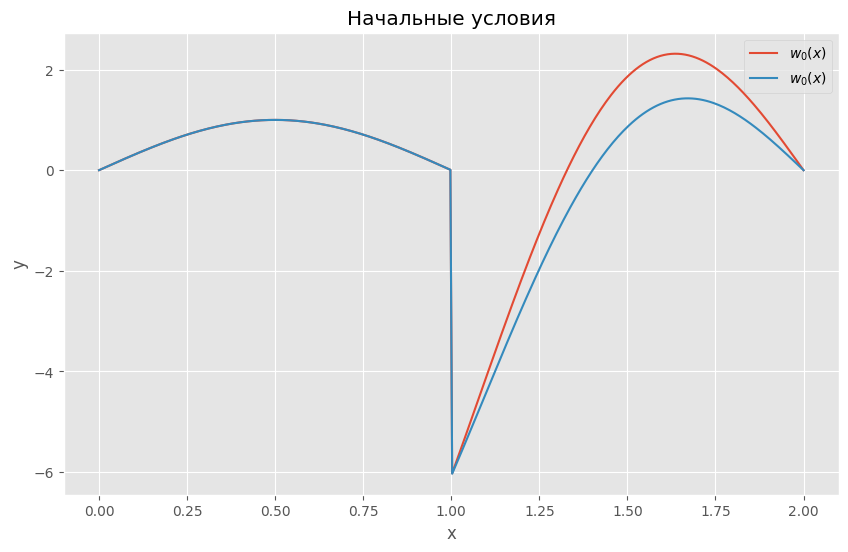

In [91]:
# Задаем область значений x
x = np.linspace(x_min, x_max, 400)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, w_0(x, c1, c2), '-', label=r"$w_0(x)$")
plt.plot(x, w_0_custom(x, c1, c2), '-', label=r"$w_0(x)$")


plt.title("Начальные условия")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# # Задаем область значений x
# x = np.linspace(x_min, x_max, 400)

# # Построение графика
# plt.figure(figsize=(10, 6))

# plt.title("Начальные условия")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend()
# plt.grid(True)
# plt.show()

In [93]:
T = 0.1  # Время
N = 10   # Число шагов по времени
M = 100  # Число шагов по пространству (четное, чтобы попасть в 1)
x_min = 0  # Минимальное значение x
x_max = 2  # Максимальное значение x
b = 10  # Константа, зависящая от задачи

# Начальная функция w(x)
def w_0(x):
    return w_01(x) + c1 * e_1(x) + c2 * e_2(x)

# Шаг по пространству
h = (x_max - x_min) / M
# Массив значений x
x = np.linspace(x_min, x_max, M + 1)

# Шаг по времени
tau = T / N

# Массив для значений u(t, x)
u_t_x = np.zeros(shape=(N + 1, M + 1))

# Начальные условия
u_t_x[0, :] = w_0(x)

# Процесс решения задачи по времени
for i in range(1, N + 1):
    T_prev = u_t_x[i - 1, :]  # Значения на предыдущем шаге
    # Матрица коэффициентов для системы линейных уравнений
    A = np.zeros(shape=(M - 1, M - 1))
    A[0, 0] = 1 / tau - b + 2 / (h ** 2)
    A[0, 1] = - 1 / h ** 2
    for j in range(1, M - 2):
        A[j, j - 1] = - 1 / h ** 2
        A[j, j] = 1 / tau - b + 2 / (h ** 2)
        A[j, j + 1] = - 1 / h ** 2
    A[M - 2, M - 3] = - 1 / h ** 2
    A[M - 2, M - 2] = 1 / tau - b + 2 / (h ** 2)

    # Вектор правой части
    f_t_x = 1 / tau * u_t_x[i - 1, :]

    # Решение системы уравнений для текущего шага
    u_t_x[i, 1:-1] = np.linalg.solve(A, f_t_x[1:-1])

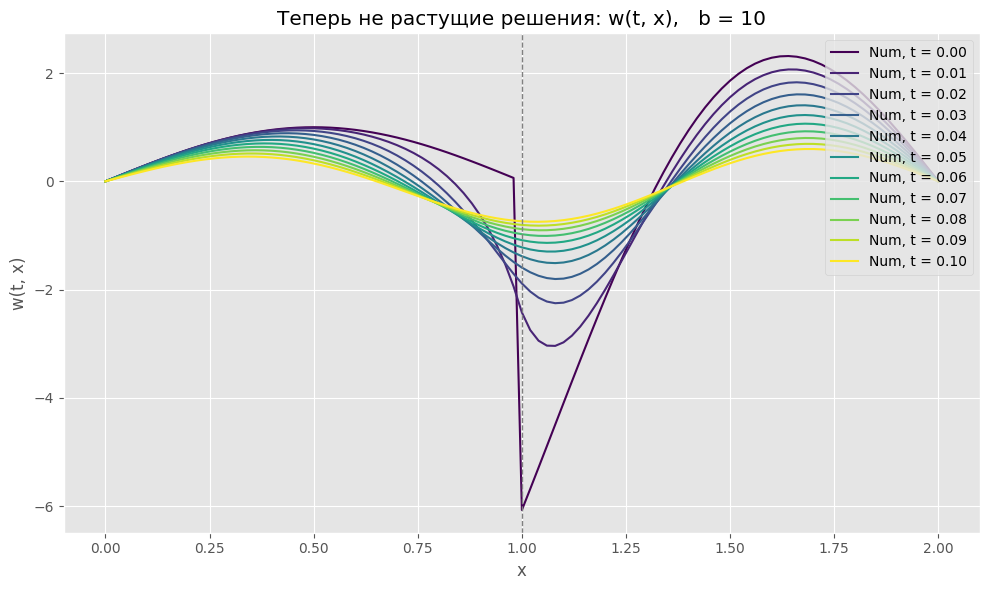

In [94]:
# Генерация цветов
# colors = generate_colors(N + 1)

# Построение графика
plt.figure(figsize=(10, 6))

for i in range(N + 1):
    t = tau * i
    plt.plot(x, u_t_x[i, :], label=f"Num, t = {t:.2f}", color=colors[i])

# Поиск значения для x=1
#i_0 = np.where(x == 1)[0][0]
#plt.scatter(np.ones(N + 1), u_t_x[:, i_0], color='brown', label="mu(t)")

# Вертикальная линия для x=1
plt.axvline(x=1, color='grey', linestyle='--', linewidth=1)

# Настройка графика
plt.title(f"Теперь не растущие решения: w(t, x),   b = {b}")
plt.xlabel("x")
plt.ylabel("w(t, x)")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()